# Connected components

This notebook illustrates the search for [connected components](https://en.wikipedia.org/wiki/Component_(graph_theory)) in graphs.

In [2]:
from IPython.display import SVG

In [3]:
import numpy as np

In [35]:
from sknetwork.data import karate_club, painters, movie_actor
from sknetwork.topology import get_connected_components
from sknetwork.visualization import svg_graph, svg_digraph, svg_bigraph
from sknetwork.utils.format import bipartite2undirected

## Graphs

In [21]:
graph = karate_club(metadata=True)
adjacency = graph.adjacency
position = graph.position

In [22]:
# subgraph
k = 15
adjacency = adjacency[:k][:,:k]
position = position[:k]

In [23]:
# connected components
labels = get_connected_components(adjacency)

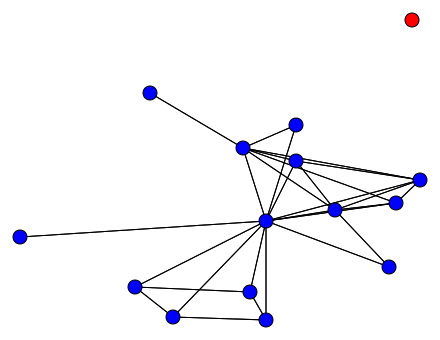

In [24]:
image = svg_graph(adjacency, position, labels=labels)
SVG(image)

## Directed graphs

In [25]:
graph = painters(metadata=True)
adjacency = graph.adjacency
names = graph.names
position = graph.position

In [30]:
# weak connected components
labels = get_connected_components(adjacency)

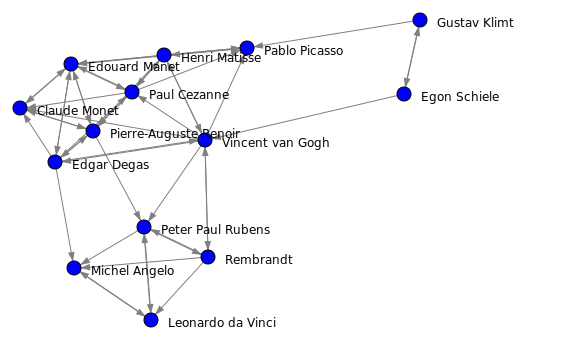

In [31]:
image = svg_digraph(adjacency, position, names, labels)
SVG(image)

In [32]:
# strong connected components
labels = get_connected_components(adjacency, connection='strong')

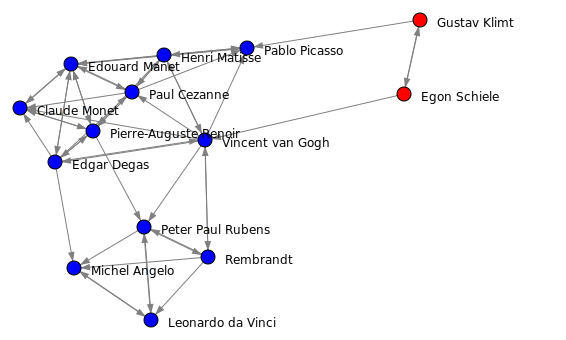

In [33]:
image = svg_digraph(adjacency, position, names, labels)
SVG(image)

## Bipartite graphs

In [89]:
graph = movie_actor(metadata=True)
biadjacency = graph.biadjacency
names_row = graph.names_row
names_col = graph.names_col

In [90]:
# subgraph
k = 5
biadjacency = biadjacency[k:]
names_row = names_row[k:]

In [91]:
adjacency = bipartite2undirected(biadjacency)

In [92]:
labels = get_connected_components(adjacency)

In [94]:
n_row, _ = biadjacency.shape
labels_row = labels[:n_row]
labels_col = labels[n_row:]

In [95]:
image = svg_bigraph(biadjacency, names_row, names_col, labels_row, labels_col)

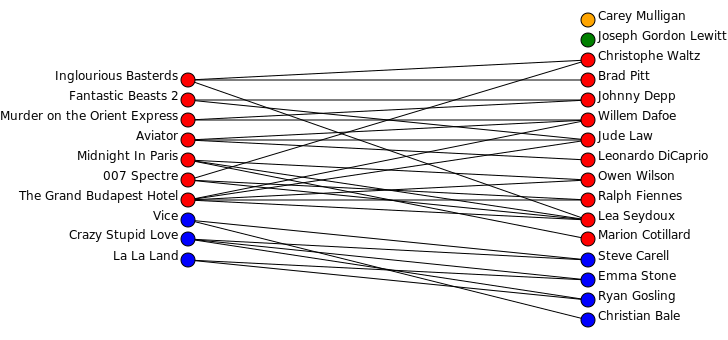

In [96]:
SVG(image)